<a href="https://colab.research.google.com/github/francesco-source/Machine-Learning/blob/main/Assosiation_rules_11_09_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assosiation rules, Exam 11/09/202

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## 1. Read a market basket database from the csv file provided and generate a dataframe basket of boolean values with one row per transaction and one column per distinct item of the database; the dataframe values must be True if a distinct item is contained in the transaction:
1. the file contains one transaction per line, the first element is the number of items in the transaction, followed by the items of the transaction, and then a variable number of empty fields
2. the field names in the first row of the csv file are not 
relevant

In [47]:
df = pd.read_csv("mba.csv")
counter = df["Item(s)"]
df.drop("Item(s)",axis =1,inplace = True)
df = df.replace(np.nan,0)
df.head()

,Item 1,Item 2,Item 3,Item 4,Item 5,Item 6,Item 7,Item 8,Item 9,Item 10,...,Item 23,Item 24,Item 25,Item 26,Item 27,Item 28,Item 29,Item 30,Item 31,Item 32
0,citrus fruit,semi-finished bread,margarine,ready soups,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,tropical fruit,yogurt,coffee,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,whole milk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,pip fruit,yogurt,cream cheese,meat spreads,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,other vegetables,whole milk,condensed milk,long life bakery product,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
print("The size of the dataset is equal to:",df.size)
print("The shape of the dataset is equal to:",df.shape)

The size of the dataset is equal to: 314720
The shape of the dataset is equal to: (9835, 32)


I now create a np.array of list where in each list there is the list of each transaction

In [49]:
X = np.array(df)
new_X = []
for i in X:
  new_list =[]
  for j in i:
    if j!= 0:
      new_list.append(j)
  new_X.append(new_list)
new_X = np.array(new_X,dtype=list)

In [50]:
encoder = TransactionEncoder()
encoded_transactions = encoder.fit_transform(new_X)
df = pd.DataFrame(encoded_transactions,columns = encoder.columns_)
df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


## 2. ignore the transactions containing a single item


In [51]:
counter = counter >1
X = np.array(df)
X = X[counter,:]

In [52]:
df = pd.DataFrame(X,columns=encoder.columns_)
print(df.shape)

(7676, 169)


## 3. Show the first five rows of the output dataframe. Show the number of transactions and of distinct items

In [53]:
df.head()

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False


In [54]:
print("The number of transaction is: ",df.shape[0])
print("The number of distinct items is: ", df.shape[1])

The number of transaction is:  7676
The number of distinct items is:  169


## 4. Find a value of min_support such that the apriori algorithm generates at least 8 frequent itemsets with at least 2 items

In [55]:
#number of transactions
min_itemsets = 8

#number of min elements in each transaction
min_item_in_itemset = 2

# "Reasonable" range
support_range = np.arange(0.1, 0.01, -0.01)

In [56]:
min_support = 0

for s_value in support_range:
  print(f"Trying support value {s_value:.2f}")

  frequent_itemsets = apriori(df, min_support = s_value, use_colnames = True)

  frequent_itemsets["len"] = frequent_itemsets['itemsets'].apply(lambda x: len(x))

# Calculate the number of itemsets that contain at least min_item_in_itemset items
  frequent_itemstets_len = len([i for i in frequent_itemsets["len"].values if i >= min_item_in_itemset])

  if frequent_itemstets_len >=min_itemsets:
    break
print("I've selected as a support:",np.round(s_value,2))
print("It produces a number of item_sets equal to:",frequent_itemstets_len,"with a number of min samples per items equal to:",2)

Trying support value 0.10
Trying support value 0.09
Trying support value 0.08
Trying support value 0.07
Trying support value 0.06
Trying support value 0.05
I've selected as a support: 0.05
It produces a number of item_sets equal to: 9 with a number of min samples per items equal to: 2


## 5.  Find the minimum metric threshold such that at least 10 association rules are extracted from the frequent itemsets found:
1. use "confidence" as metric and output the line below.
2. Metric: "confidence" - min_metric: 0.xxxx - Number of rules: n

In [57]:
metric = "confidence"

num_rules = 10

threshold = np.arange(1,0.01,-0.01)
min_t = 0

for t in threshold:

  min_t = t

  rules = association_rules(frequent_itemsets, metric=metric, min_threshold=t)

  if len(rules["confidence"].values)>=num_rules:

    break

print("The minimun threshold for confidence is equal to: ",np.round(min_t,4)," in order to generate ",num_rules," rules.")

The minimun threshold for confidence is equal to:  0.25  in order to generate  10  rules.


## 5. Print the first 10 rules found, sorted by descending confidence and support

In [58]:
rules.sort_values(by = ["confidence","support"],ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,(root vegetables),(whole milk),0.136399,0.311621,0.062663,0.459408,1.474254,0.020158,1.273380
0,(root vegetables),(other vegetables),0.136399,0.239838,0.060709,0.445081,1.855754,0.027995,1.369861
9,(yogurt),(whole milk),0.173528,0.311621,0.071782,0.413664,1.327459,0.017707,1.174035
8,(tropical fruit),(whole milk),0.131449,0.311621,0.054195,0.412289,1.323049,0.013233,1.171290
3,(other vegetables),(whole milk),0.239838,0.311621,0.095883,0.399783,1.282915,0.021145,1.146884
5,(rolls/buns),(whole milk),0.221470,0.311621,0.072564,0.327647,1.051429,0.003549,1.023836
4,(yogurt),(other vegetables),0.173528,0.239838,0.055628,0.320571,1.336610,0.014009,1.118823
2,(whole milk),(other vegetables),0.311621,0.239838,0.095883,0.307692,1.282915,0.021145,1.098011
1,(other vegetables),(root vegetables),0.239838,0.136399,0.060709,0.253123,1.855754,0.027995,1.156283
7,(soda),(whole milk),0.203101,0.311621,0.051329,0.252726,0.811006,-0.011962,0.921187


## 6.  Plot confidence and support for all the sorted rules found

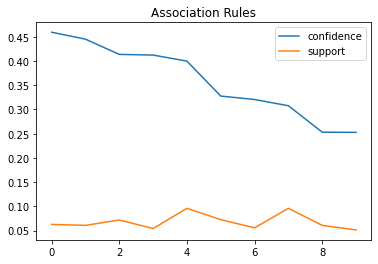

In [60]:
sorted_rules = rules.sort_values(by=['confidence','support'],ascending=False).reset_index(drop=True)
sorted_rules[['confidence','support']].plot(title='Association Rules');


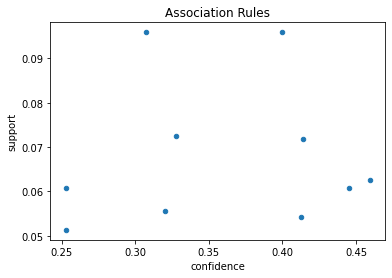

In [61]:
fig = sorted_rules.plot.scatter(x = 'confidence', y = 'support', title ='Association Rules');